Random Seeding & Enable Determinism to produce replicable results

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

2024-03-11 14:49:04.390504: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-11 14:49:04.408912: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 14:49:04.408938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 14:49:04.409470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-11 14:49:04.412767: I tensorflow/core/platform/cpu_feature_guar

Importing libraries and modules

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from keras import layers
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.utils import to_categorical

print(tf.__version__) 

2.15.0


Load Dataset

In [3]:
filename = "mocap dataset.csv"
filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{filename}"

df = pd.read_csv(filepath)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)
df

,Pelvis_extension,Pelvis_lateral_flexion_rotation,Pelvis_axial_rotation,LeftHip_flexion,LeftHip_adduction,LeftHip_external_rotation,LeftKnee_flexion,LeftKnee_adduction,LeftKnee_external_rotation,LeftAnkle_dorsiflexion,...,RightScapula_posterior_tilt,RightShoulder_flexion,RightShoulder_abduction,RightShoulder_external_rotation,RightElbow_flexion,RightElbow_abduction,RightElbow_pronation,RightWrist_flexion,RightWrist_abduction,RightWrist_pronation
0,-9.046156,-2.043135,15.423850,16.315730,-2.176447,3.557985,-20.284060,0.002008,0.0,12.822370,...,-7.222870,-3.128814,-4.325992,-0.197741,6.993781,-2.687741,12.771290,6.443907,-6.364083,0.717370
1,-9.041094,-2.024045,15.294020,16.273570,-2.145615,3.535517,-20.223180,0.002035,0.0,12.763170,...,-7.266767,-3.341406,-4.194280,-0.005949,5.846905,-2.109600,12.207390,6.443938,-6.364090,0.717370
2,-9.036833,-2.017638,15.232000,16.245790,-2.136333,3.507773,-20.183570,0.002015,0.0,12.729040,...,-7.291833,-3.451562,-4.118608,0.078192,5.292946,-1.873890,11.996300,6.443938,-6.364083,0.717370
3,-9.027501,-2.013260,15.099430,16.181450,-2.133915,3.430795,-20.087540,0.001865,0.0,12.658100,...,-7.330745,-3.683339,-3.950271,0.236885,4.553975,-1.617327,11.806790,6.443938,-6.364083,0.717370
4,-9.025716,-2.009804,14.967540,16.124690,-2.125500,3.346148,-19.995180,0.001769,0.0,12.579530,...,-7.376345,-3.931587,-3.766344,0.415637,3.538838,-1.371222,11.803300,6.443907,-6.364090,0.717098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50744,-8.882502,-1.408453,-4.250266,7.732232,5.765028,-1.364727,0.000000,-0.000178,0.0,-3.379682,...,-8.575309,-10.832440,3.651787,10.399640,6.520080,-5.493917,-0.302612,6.443938,-6.364090,0.717370
50745,-9.176225,-1.344468,-3.955720,7.645190,5.682390,-1.322490,-0.044235,-0.000164,0.0,-2.883508,...,-8.753312,-11.274260,3.605326,10.580370,6.830098,-5.919752,-0.169020,6.443938,-6.364097,0.717370
50746,-9.310635,-1.303828,-3.863307,7.586411,5.642023,-1.282832,-0.044235,-0.000184,0.0,-2.650036,...,-8.852416,-11.432010,3.534685,10.652270,6.867785,-6.101278,-0.039565,6.443938,-6.364097,0.717098
50747,-9.521404,-1.178317,-3.701105,7.405150,5.607660,-1.134532,0.000000,-0.000164,0.0,-2.223960,...,-9.039616,-11.598260,3.334719,10.819220,6.764049,-6.280038,-0.019782,6.443938,-6.364090,0.717370


In [4]:
# scaler = MinMaxScaler(feature_range=(-1,1))

# scaler.fit(df)

# df = scaler.transform(df)
# df

Plotting Distribution of Classes

In [5]:
labels_filename = "labels.xlsx"
labels_filepath = f"/home/RUS_CIP/st179677/project/dataset/5 users/{labels_filename}"
labels_df = pd.read_excel(labels_filepath)
print(labels_df)

# # Sort the labels for better visualization
# sorted_labels = label_counts.index.sort_values()

# # Plot the distribution
# plt.bar(sorted_labels, label_counts[sorted_labels])
# plt.xlabel('Class Labels')
# plt.ylabel('Frequency')
# plt.title('Distribution of Class Labels')
# plt.show()

       labels
0           0
1           0
2           0
3           0
4           0
...       ...
50744       4
50745       4
50746       4
50747       4
50748       4

[50749 rows x 1 columns]


In [6]:
# Create 51 empty lists with names X0 to X50
X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y = ([] for _ in range(52))

# # Print the lists for verification
# for i, X_list in enumerate([X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y]):
#     print(f"{X_list=}")


Create Sequences from Dataset

In [7]:
timesteps = 300

# Iterate over the range of rows in df
for i in range(0, df.shape[0] - timesteps):
    for j in range(51):  # Loop for column indexing
        globals()[f'X{j}'].append(df.iloc[i:i + timesteps, j])

# Iterate over the range of rows in labels_df
for i in range(0, labels_df.shape[0] - timesteps):
     y.append(labels_df.iloc[i + timesteps, 0])

In [8]:
type(y)

list

In [9]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [10]:
X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, y = np.array(X0),  np.array(X1),  np.array(X2),  np.array(X3),  np.array(X4),  np.array(X5),  np.array(X6),  np.array(X7),  np.array(X8),  np.array(X9),  np.array(X10), np.array(X11) , np.array(X12) , np.array(X13) , np.array(X14) , np.array(X15) , np.array(X16) , np.array(X17) , np.array(X18) , np.array(X19) , np.array(X20) , np.array(X21) , np.array(X22) , np.array(X23) , np.array(X24) , np.array(X25) , np.array(X26) , np.array(X27) , np.array(X28) , np.array(X29) , np.array(X30) , np.array(X31) , np.array(X32) , np.array(X33) , np.array(X34) , np.array(X35) , np.array(X36) , np.array(X37) , np.array(X38) , np.array(X39) , np.array(X40) , np.array(X41) , np.array(X42) , np.array(X43) , np.array(X44) , np.array(X45) , np.array(X46) , np.array(X47) , np.array(X48) , np.array(X49) , np.array(X50) , np.array(y)

In [11]:
X0.shape

(50449, 300)

In [12]:
X0

array([[ -9.046156,  -9.041094,  -9.036833, ..., -12.49571 , -12.50685 ,
        -12.52502 ],
       [ -9.041094,  -9.036833,  -9.027501, ..., -12.50685 , -12.52502 ,
        -12.52865 ],
       [ -9.036833,  -9.027501,  -9.025716, ..., -12.52502 , -12.52865 ,
        -12.52749 ],
       ...,
       [ 10.46251 ,  10.45581 ,  10.4496  , ...,  -8.701501,  -8.882502,
         -9.176225],
       [ 10.45581 ,  10.4496  ,  10.44634 , ...,  -8.882502,  -9.176225,
         -9.310635],
       [ 10.4496  ,  10.44634 ,  10.44551 , ...,  -9.176225,  -9.310635,
         -9.521404]])

In [13]:
X = np.stack((X0, X1, X2, X3, X4, X5, X6,  X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50 ), axis=2)

In [14]:
# scaler = MinMaxScaler(feature_range=(0,1))

# scaler.fit(df)

# df = scaler.transform(df)
# df

In [15]:
X.shape

(50449, 300, 51)

In [16]:
y.shape

(50449,)

In [17]:
# convert labels to one hot encoded

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# encode integers to one hot encoded values
Y = to_categorical(encoded_Y)
print(Y)
print(Y.shape)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
(50449, 5)


In [18]:
#splitting dataset into train, test and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

print("X train :",X_train.shape)
print("y train:", y_train.shape)
print("X test :", X_test.shape)
print("y test :" ,y_test.shape)
print("X val :" ,X_val.shape)
print("y val :" ,y_val.shape)

# print(X_train)
# print(X_test)
# print(y_train) 
# print(y_val)



X train : (36323, 300, 51)
y train: (36323, 5)
X test : (10090, 300, 51)
y test : (10090, 5)
X val : (4036, 300, 51)
y val : (4036, 5)


In [19]:
# from tensorflow.keras.optimizers import Adam

# def model_builder(hp):
#     model = tf.keras.Sequential()

#     hp_gru_neurons = hp.Int('GRU_layer', min_value=32, max_value=64, step=32)
#     hp_dense_neurons_l1 = hp.Int('Dense_layer_1', min_value=10, max_value=20, step=5)
#     hp_dense_neurons_l2 = hp.Int('Dense_layer_2', min_value=10, max_value=20, step=5)
#     hp_dropout = hp.Choice('dropout', values=[0.0,0.1])
#     hp_lr = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])

#     model.add(GRU(hp_gru_neurons, input_shape=(300,51), dropout=hp_dropout))
#     model.add(Dense(hp_dense_neurons_l1, activation='relu'))
#     model.add(Dense(hp_dense_neurons_l2, activation='relu'))
#     model.add(Dense(5, activation='sigmoid'))

#     model.compile(optimizer=Adam(learning_rate=hp_lr),loss='categorical_crossentropy', metrics=['accuracy'])
    
#     return model

In [20]:
# import keras_tuner as kt

# tuner = kt.GridSearch(model_builder,
#                      objective='val_accuracy',
#                      seed=1,
#                      max_retries_per_trial=3,
#                      max_consecutive_failed_trials=5
#                      )

In [21]:
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

In [22]:
# tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val) , callbacks=[early_stopping])

In [23]:
# best_hps = tuner.get_best_hyperparameters()[0]
# print(best_hps.values)

In [24]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# from keras.callbacks import TensorBoard
# import time

# NAME = "GRU-model-{}".format(int(time.time()))

# tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

# model = tuner.hypermodel.build(best_hps)
# history = model.fit(X_train, y_train, epochs=60, validation_data=[X_val, y_val],callbacks=[early_stopping, tensorboard])

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import TensorBoard
import time

NAME = "GRU-model-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

filepath_1 = '/home/RUS_CIP/st179677/project/model/models/gru_best_model.h5'
checkpoint = ModelCheckpoint(filepath=filepath_1, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)

callbacks_list = [early_stopping, tensorboard]

In [26]:
# gru_model = rnn_model(16, 2, 0.5, 10, 2, 60, 'gru')
# gru_model.summary()

gru_model = Sequential()
gru_model.add(layers.GRU(32, input_shape=(300,51), dropout=0.1))
# gru_model.add(layers.GRU(32, input_shape=(51,32), dropout=0.5))
gru_model.add(Dense(10, activation='relu'))
gru_model.add(Dense(20, activation='relu'))
gru_model.add(Dense(5, activation='sigmoid'))
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                8160      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
Total params: 8815 (34.43 KB)
Trainable params: 8815 (34.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-11 14:51:05.076751: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-11 14:51:05.076876: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-11 14:51:05.093784: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

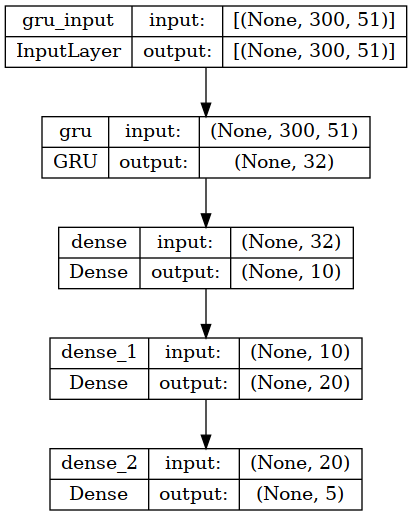

In [27]:
from keras.utils import plot_model
plot_model(gru_model,show_shapes= True, show_layer_names= True, to_file='/home/RUS_CIP/st179677/project/model/GRU.png')

In [28]:
#GRU model
from keras.optimizers import Adam

adam = Adam(learning_rate=0.001)
# chk = ModelCheckpoint('best_model.pkl', monitor='val_acc', save_best_only=True, mode='max', verbose=1)
gru_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
gru_history=gru_model.fit(X_train, y_train ,validation_data=([X_val], y_val), epochs=60, batch_size=48, callbacks=callbacks_list)

Epoch 1/60


2024-03-11 14:51:08.727046: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-11 14:51:08.885394: I external/local_xla/xla/service/service.cc:168] XLA service 0xb288540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-11 14:51:08.885414: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-03-11 14:51:08.885420: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-03-11 14:51:08.889662: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710165068.944340  536702 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


757/757 [==============================] - 8s 8ms/step - loss: 0.3013 - accuracy: 0.8955 - val_loss: 0.1480 - val_accuracy: 0.9569
Epoch 2/60
757/757 [==============================] - 6s 8ms/step - loss: 0.0706 - accuracy: 0.9805 - val_loss: 0.1105 - val_accuracy: 0.9656
Epoch 3/60
757/757 [==============================] - 6s 8ms/step - loss: 0.0520 - accuracy: 0.9862 - val_loss: 0.0792 - val_accuracy: 0.9802
Epoch 4/60
757/757 [==============================] - 6s 8ms/step - loss: 0.0454 - accuracy: 0.9883 - val_loss: 0.0639 - val_accuracy: 0.9866
Epoch 5/60
757/757 [==============================] - 6s 8ms/step - loss: 0.0407 - accuracy: 0.9900 - val_loss: 0.0709 - val_accuracy: 0.9809
Epoch 6/60
757/757 [==============================] - 6s 8ms/step - loss: 0.0384 - accuracy: 0.9909 - val_loss: 0.0601 - val_accuracy: 0.9859
Epoch 7/60
757/757 [==============================] - 6s 8ms/step - loss: 0.0376 - accuracy: 0.9907 - val_loss: 0.0641 - val_accuracy: 0.9836
Epoch 8/60
757/75

In [29]:
# %tensorboard --logdir='logs/'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


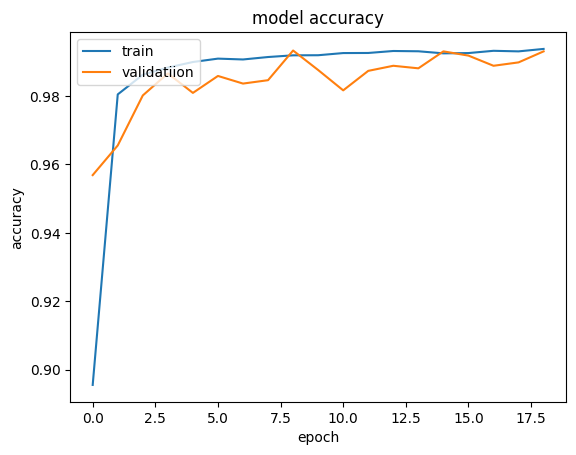

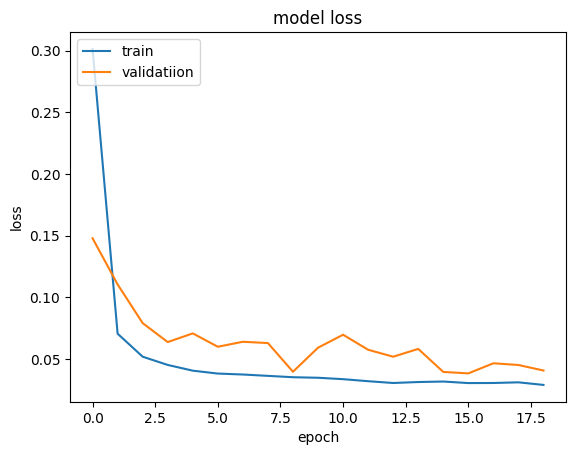

In [30]:
# list all data in history
print(gru_history.history.keys())

# summarize history for accuracy
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatiion'], loc='upper left')
plt.show()

In [31]:
#predicting on test datset
from keras.models import load_model
from sklearn.metrics import accuracy_score
# model = load_model(model_filepath)
gru_classify_x=gru_model.predict(X_test) 
# print(classify_x)
gru_classes_x=np.argmax(gru_classify_x,axis=1)
y_test= np.argmax(y_test,axis=1)
print(gru_classes_x)
accuracy = accuracy_score(y_test, gru_classes_x)
accuracy

316/316 [==============================] - 1s 3ms/step
[1 1 1 ... 4 4 4]


0.9672943508424182

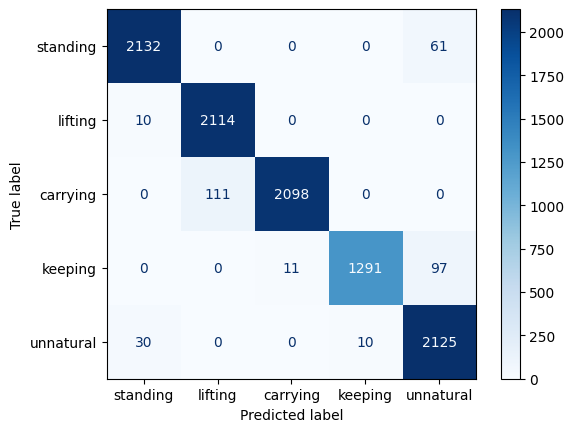

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2193
           1       0.95      1.00      0.97      2124
           2       0.99      0.95      0.97      2209
           3       0.99      0.92      0.96      1399
           4       0.93      0.98      0.96      2165

    accuracy                           0.97     10090
   macro avg       0.97      0.96      0.97     10090
weighted avg       0.97      0.97      0.97     10090



In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


labels = ["standing", "lifting", "carrying", "keeping", "unnatural"]

cm = confusion_matrix(y_test, gru_classes_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, gru_classes_x))

In [33]:
# model_filepath=f'/home/RUS_CIP/st179677/project/model/{round(accuracy*100,2)}_gru_model.keras'

# gru_model.save(model_filepath)
# gru_model.save(model_filepath, save_format='h5')